In [5]:
from definitions import ROOT_DIR
from plot.plot_cost import plot_performance
from plot.plot_path import *
from config import *
from agent.agents import *
from agent.switching_agents import *
from experiments.experiments import *
import os 
import pickle


with open(f'{ROOT_DIR}/outputs/eval_set_scGen', 'rb') as file:
    eval_set_scGen = pickle.load(file)

Evaluate optimal planning for test set episodes to have a lower bound on average trajectory cost

In [6]:
eval_sets = {'Gen': eval_set_scGen}
optimal_cost = {k: np.mean( [ OptimalAgent(grid, 0.0).eval() for grid in eval_set]) for k,eval_set in eval_sets.items()}
print(optimal_cost)

{'Gen': 4.544}


## Quantitative plots 
Below are produced the quantitative plots for each scenario examined in the paper.
To do so the results files with the saved evaluation metrics must be available under ```\results``` folder for all methods. 1st plot is the average times machine was picked in evaluation,
2nd plot is the average trajecotry cost in evaluation.

### *Scenario I* 
 
* $c_c(0) = c_c(1) = 0$ 
* human ignores $\texttt{car}$
* machine ignores $\texttt{grass}$



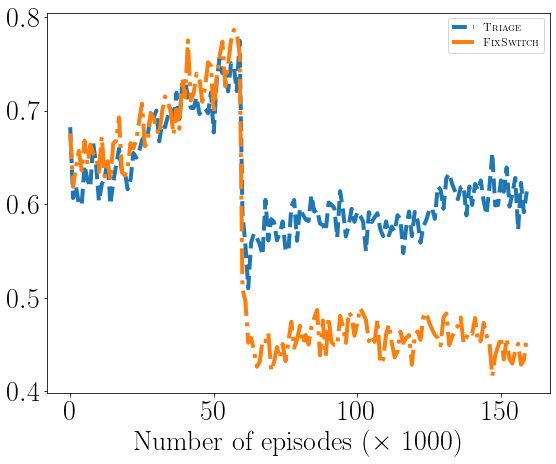

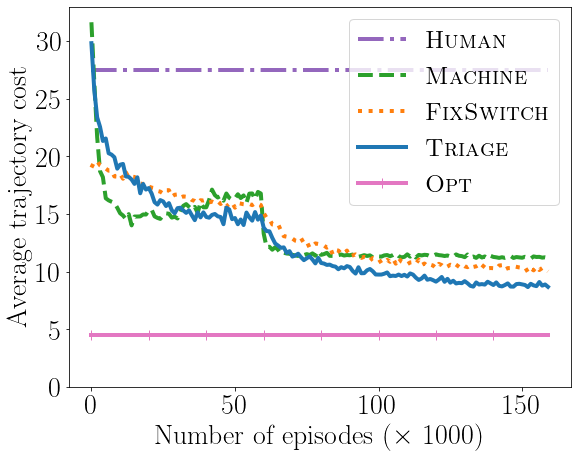

In [9]:
human = NoisyDriverAgent(env_generator, prob_wrong=0.0, p_ignore_car = 1.0, setting=2,  c_H=0)
root_dir = f'{ROOT_DIR}/results/final'
agents = [f'autoV2_scGen_b1_We_offT_D60.0K1R_on_D100.0K_h0.0',
          f'switchV2_scGen_b1_We_offT_D60.0K1R_on_D100.0K_h0.0',
          f'fxdV2_scGen_b1_We_offT_D60.0K1R_on_D100.0K_h0.0'
          ]
df = plot_performance(root_dir,eval_set_scGen, agents, human=human, optimal_c=optimal_cost['Gen'])

### *Scenario II* 
 
* $c_c(0) = 0, c_c(1) = 1$ 
* human ignores $\texttt{car}$
* machine recognizes everything

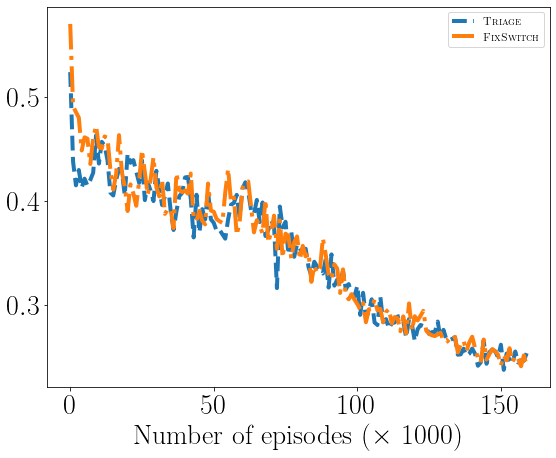

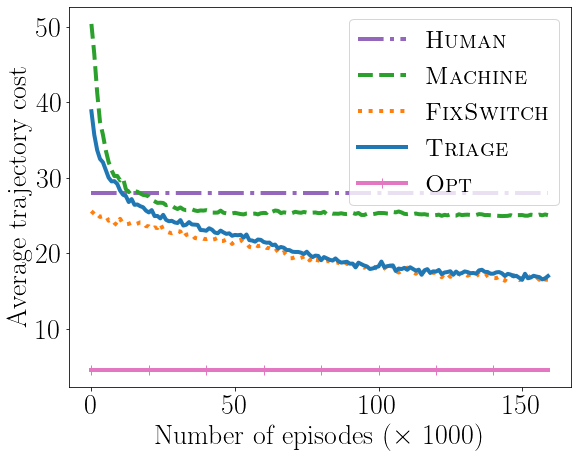

In [ ]:
human = NoisyDriverAgent(env_generator, prob_wrong=estimation_noise, p_ignore_car = 1.0, setting=3, c_H=0)
root_dir = f'{ROOT_DIR}/results'
agents = [f'autoV3_scGen_b1_We_offT_D60.0K1R_on_D100.0K_h0.0',
          f'switchV3_scGen_b1_We_offT_D60.0K1R_on_D100.0K_h0.0',
          f'fxdV3_scGen_b1_We_offT_D60.0K1R_on_D100.0K_h0.0'
          ]
df = plot_performance(root_dir,eval_set_scGen, agents, human=human, optimal_c=optimal_cost['Gen'])

### *Scenario III* 
 
* $c_c(0) = 1, c_c(1) = 0$ 
* human ignores $\texttt{grass}$
* human ignores $\texttt{car}$ momentarily after switching
* machine ignores $\texttt{stone}$

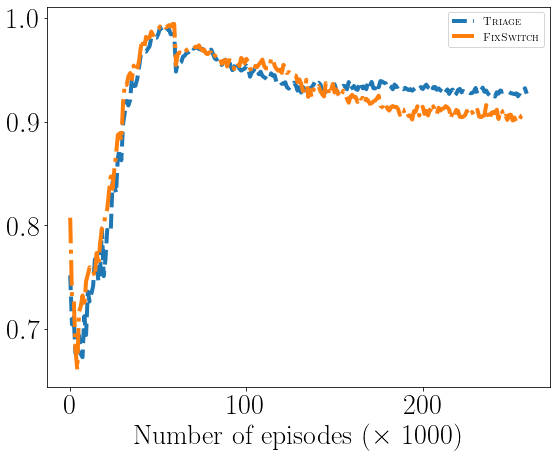

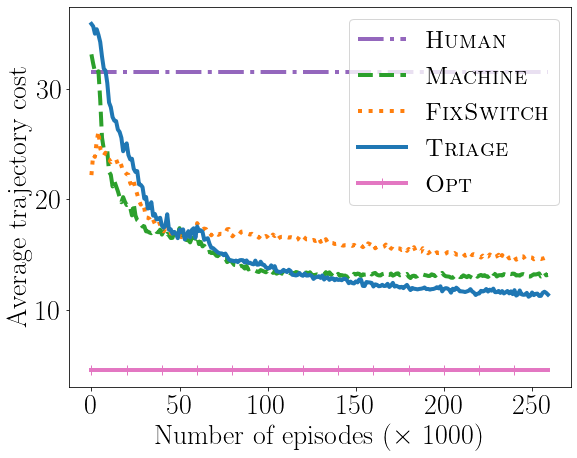

In [ ]:
human = NoisyDriverAgent(env_generator, prob_wrong=estimation_noise, p_ignore_car = p_ignore, setting=7, c_H=1)
root_dir = f'{ROOT_DIR}/results'
agents = [
          f'autoV7_scGen_b1_We_offT_D60.0K1R_on_D200.0K_h0.0',
          f'switchV7_scGen_b1_We_offT_D60.0K1R_on_D200.0K_h0.0',
          f'fxdV7_scGen_b1_We_offT_D60.0K1R_on_D200.0K_h0.0'
          ]
df = plot_performance(root_dir,eval_set_scGen, agents, human=human, optimal_c=optimal_cost['Gen'])

## Qualitative plots

Example code for producing qualitative plots for *Scenario I* for method <span style="font-family:'Computer Modern';font-variant:small-caps;">triage</span> for the first 20 episodes in test set.

In [ ]:
root_dir = ROOT_DIR+'/results'
# pick the agents and setting accordingly
setting = 2
c_H = 0
dir = root_dir+f'/switchV{setting}_scGen_b1_We_offT_D60.0K1R_on_D100.0K_h0.0'

with open(f'{dir}/switching_agent_on', 'rb') as file:
    switching_agent = pickle.load(file)
with open(f'{dir}/actor_agent_on', 'rb') as file:
    machine = pickle.load(file)

human = NoisyDriverAgent(env_generator, prob_wrong=estimation_noise, p_ignore_car=p_ignore, setting=setting, c_H=c_H)


In [ ]:
root_plot_dir = f'{root_dir}/grid_plots'
if not os.path.exists(root_plot_dir):
    os.mkdir(root_plot_dir)
plot_dir = f'{root_plot_dir}/{dir.split("/")[-1]}' 
if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)
print(plot_dir)

base = 0
for i,grid in enumerate(eval_set_scGen[base:base+20]):
    plt_path = PlotPath(grid, n_try=1)
    cost = grid.plot_trajectory(switching_agent, [human, machine], plt_path, show_cf=False)
    plt_path.plot(f'{plot_dir}/grid_{base+i}.png')